
# Financial Analysis Overview



In the world of corporate finance, stakeholders trying to assess a company's strategic posture and economic viability must grasp the nuances of its financial structure. With a special emphasis on the Cost of Debt, Cost of Equity, and Weighted Average Cost of Capital (WACC), this study acts as an analytical compass, guiding consumers through the complex world of financial indicators. These factors are more than just numbers; they represent indicators of a company's financial stability, risk tolerance, and investment appeal.

This analytical journey is about more than simply statistics; it's about using data to tell a story and understanding the significance of the numbers within a larger economic and industry-specific framework. This report attempts to provide stakeholders with actionable insights, facilitating well-informed decision-making and strategic planning, by automating the retrieval and processing of financial data. This notebook is designed to provide a clear, succinct, and thorough financial analysis by carefully combining theory and practice with real-world examples to demystify complicated financial concepts.



# Utilizing Data Retrieval and Financial Analysis Tools 

The included cell shows how to set up the required Python packages and then use a Jupyter Notebook environment to develop financial analysis and data retrieval capabilities.

First, the code uses the pip package manager to install the necessary packages, making sure that the libraries needed for financial modelling, data retrieval, and visualisation are available.

Next, the code imports several modules to enable data manipulation, statistical analysis, and plotting in the notebook. These modules include wrds, numpy, pandas, and matplotlib, among others, from the installed packages.

The selected timeframe for the analysis is '2014-01-05' to '2024-01-05', denoting the duration of data retrieval and analysis.




In [7]:
!pip install wrds==3.1.0
!pip install SQLAlchemy==1.4.52
!pip install pyfinra==0.2.1
!pip install yfinance
!pip install matplotlib

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import wrds
import numpy as np
import pandas as pd
import yfinance as yf
import pyfinra as pf
from math import exp
from pyfinra.ticker import Ticker
from scipy import stats
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

# Chosen Timeline 
start = '2014-01-05'
end = '2024-01-05'

# Enhancing Financial Analysis: The Power of User-Inputted Company Symbols

Enabling user input for company symbols in this assignment accomplishes multiple important goals. First of all, it enables users to concentrate on businesses that personally interest them or those that belong to a particular industry, making our study more adaptable and customised. This guarantees our research's relevance and specificity.


Second, user input simplifies the process of obtaining current financial data for particular organisations by streamlining the automation of data retrieval. This improves our reports' timeliness and accuracy, which results in analyses that are more trustworthy.

Lastly, users directly influence the study by selecting which firms to examine, which encourages participation and permits a customised examination of financial measures catered to their investing objectives or areas of interest.


In [8]:
tickers = []
x=0
while x < 3:
    ticker = input("Insert Company Symbol:")
    tickers.append(ticker)
    x = x+1

Insert Company Symbol:AMZN
Insert Company Symbol:SBUX
Insert Company Symbol:NKE


### Reasons to compare a stock's analysis to that of the S&P 500:

Assess Performance: You may determine whether a stock is outperforming or lagging the market by comparing daily returns. This aids in determining if the stock is bringing something special to your portfolio.

Calculate Volatility: Daily returns also reveal the extent to which the stock price varies in relation to the market. This aids in your comprehension of the risk associated with stock ownership.

Determine Trends: Trends and patterns in the interaction between the stock and the market can be found by analysing historical data. You can use this to forecast behaviour in the future and make wise investing choices.
 
### This function automates the process by:

Collecting Information: It pulls up historical price information for the stock you are considering as well as the S&P 500.

Compiling Returns: It provides a more comprehensive view of performance by computing the daily price fluctuations for both.

Relationship Analysis: It gets the data ready for statistical analysis to find the "beta," which is a crucial indicator of how much the stock fluctuates in response to market movements.

Visualisation: It helps you spot any odd trends by generating a visual depiction of the relationship between the returns of the stock and the returns of the market.

Quantifiable Insights: Lastly, it offers the crucial beta and alpha values. In particular, beta indicates whether a stock is more (beta > 1) or less (beta < 1) volatile than the market. Making wise investing decisions requires having access to this information.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


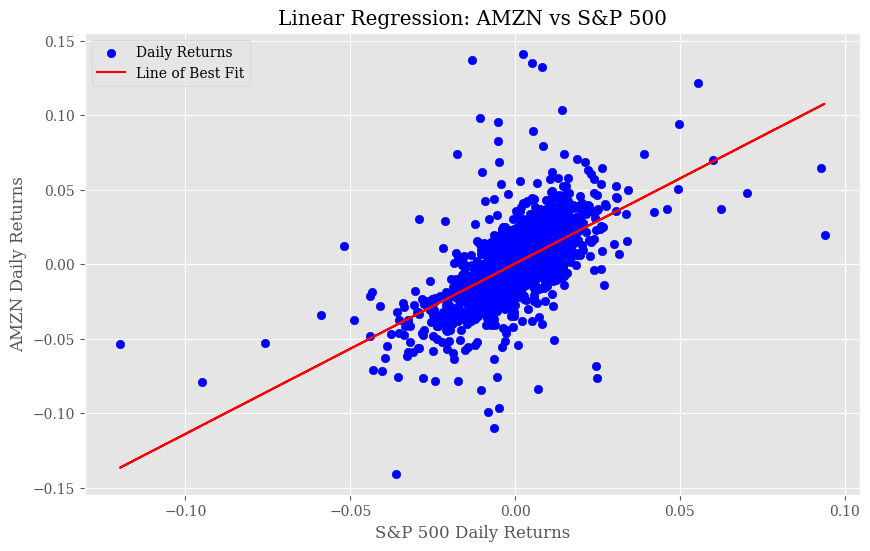

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Alpha (intercept) for AMZN: 0.0005108149066009416
Beta (slope) for AMZN: 1.1427545683468943


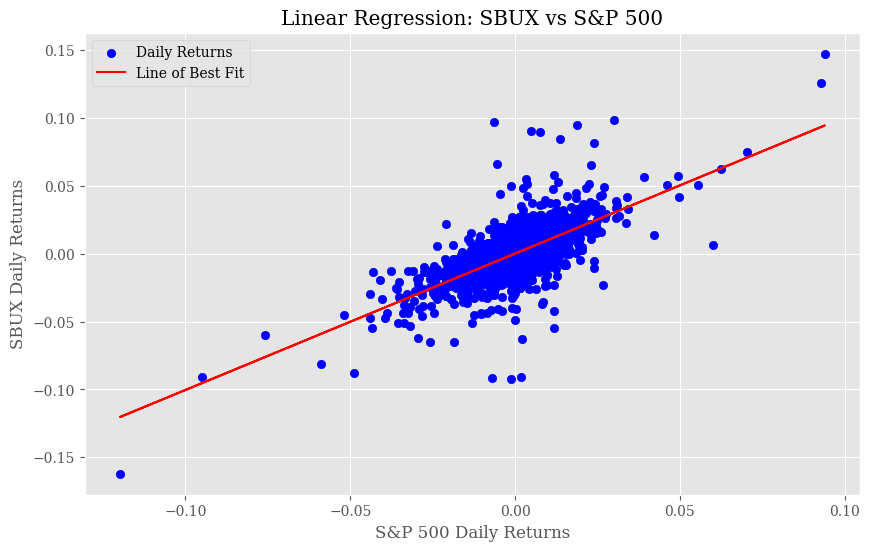

[*********************100%%**********************]  1 of 1 completed

Alpha (intercept) for SBUX: 0.0001261088121230878
Beta (slope) for SBUX: 1.004798563895572



[*********************100%%**********************]  1 of 1 completed


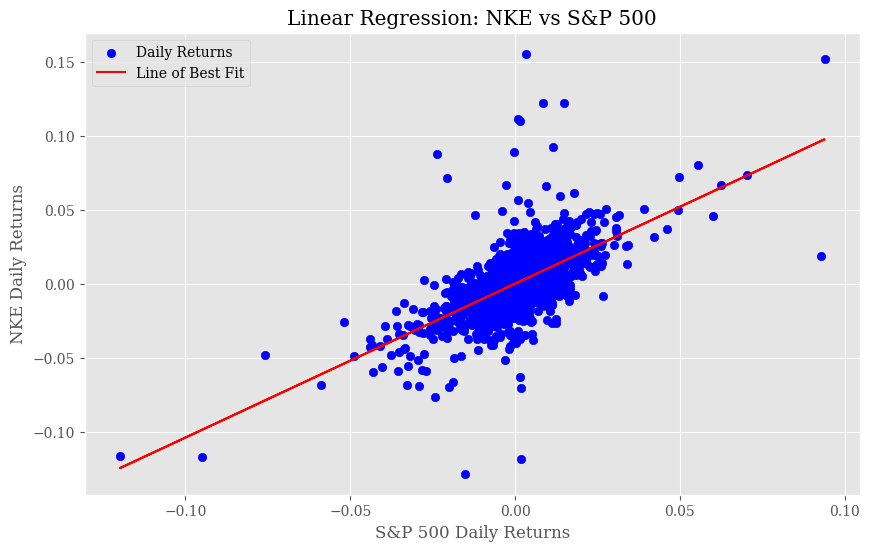

Alpha (intercept) for NKE: 0.0001390097661868857
Beta (slope) for NKE: 1.0382809251878244


In [9]:
def analyze_ticker(ticker_symbol):
    # Fetching historical data for companies and S&P 500
    ticker_data = yf.download(ticker_symbol, start='2014-01-05', end='2024-01-05')['Adj Close']
    gspc_data = yf.download('^GSPC', start='2014-01-05', end='2024-01-05')['Adj Close']

    # Calculating daily returns
    ticker_returns = ticker_data.pct_change().dropna()
    gspc_returns = gspc_data.pct_change().dropna()

    # data preparation for leniar regression
    X = gspc_returns.values.reshape(-1, 1)  # S&P 500 returns
    y = ticker_returns.values  # Ticker returns

    # linear regression
    reg = LinearRegression().fit(X, y)

    # Get the slope (beta) and intercept (alpha)
    alpha, beta = reg.intercept_, reg.coef_[0]

    # Predict values for the line of best fit
    y_pred = reg.predict(X)

    # Plot the data points and the line of best fit
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Daily Returns')  # Data points
    plt.plot(X, y_pred, color='red', label='Line of Best Fit')  # Line of best fit
    plt.title(f'Linear Regression: {ticker_symbol} vs S&P 500')
    plt.xlabel('S&P 500 Daily Returns')
    plt.ylabel(f'{ticker_symbol} Daily Returns')
    plt.legend()
    plt.show()

    # Output the alpha and beta values
    print(f'Alpha (intercept) for {ticker_symbol}: {alpha}')
    print(f'Beta (slope) for {ticker_symbol}: {beta}')

# Here we assume 'tickers' is the list of ticker symbols entered by the user
for ticker in tickers:
    analyze_ticker(ticker)

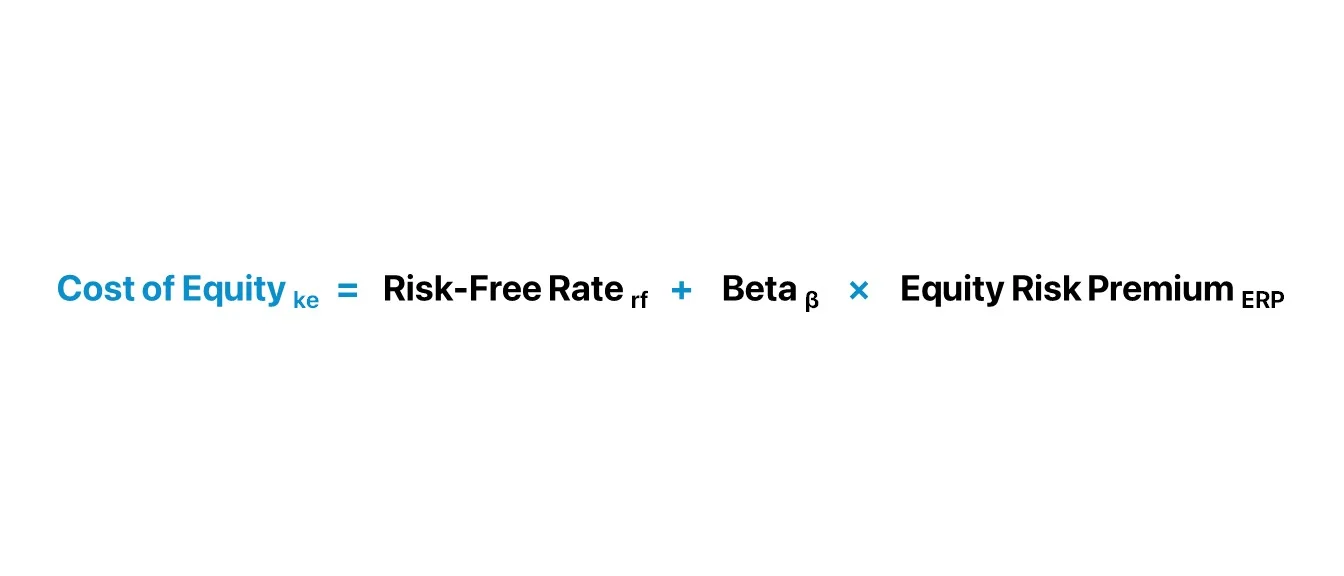

In [10]:
from IPython.display import Image
Image(filename='Cost-of-Equity-Formula.jpeg')


# Understanding Cost of Equity Calculation Using CAPM in Financial Analysis

This function uses the Capital Asset Pricing Model (CAPM) to calculate the cost of equity in order to address both.

#### Why Does Equity Cost Matter?

The lowest return that investors anticipate from a company's stock is indicated by the cost of equity. For a number of financial decisions, it's essential:

Businesses use capital budgeting to determine whether new initiatives will provide enough value to warrant funding. For a project to be taken into consideration, its estimated return must be greater than the equity cost.

Investment evaluation:  It helps investors evaluate projected returns from various equities so they may make well-informed decisions. Investors must have faith that a high cost of equities stock will yield returns equal to or greater than that.

Company Valuation: Knowing the cost of equity helps determine a company's overall worth. A company with a lower cost of equity can access capital more cheaply, potentially leading to higher valuations.
How This Function Helps

#### This code automates calculating the cost of equity using CAPM. Here's what it does:

Data collection: It pulls up historical S&P 500 and stock price data that you are interested in. The beta coefficient, which gauges how the stock price fluctuates in relation to the market, can be found with the help of this data.

Beta and Risk: Regression analysis is used to compute beta, and the risk-free rate (such as the yield on a Treasury bond) is obtained. The risk-free rate is a guarantee of return free from risk, whereas beta indicates how risky the stock is in relation to the market.
Calculating the Cost of Equity Lastly, the cost of equity is calculated using the CAPM with the beta, risk-free rate, and market return (calculated using data from the S&P 500).


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


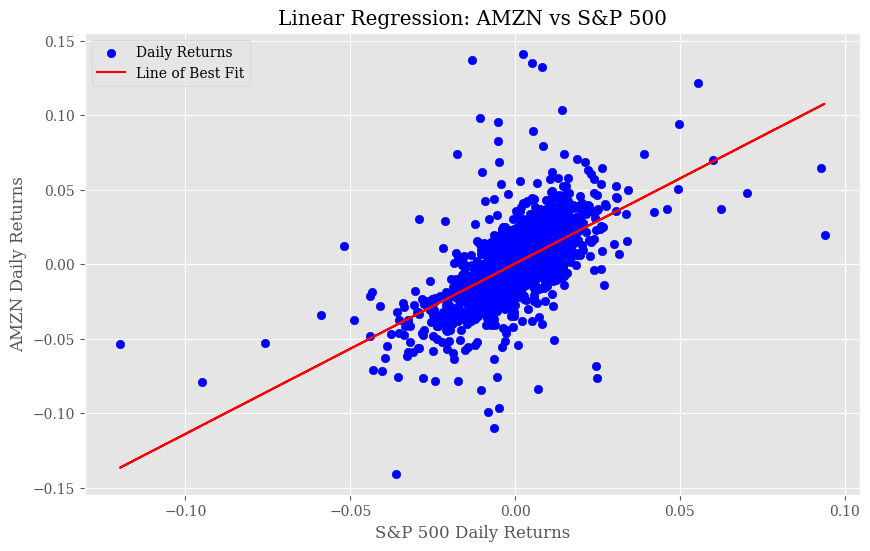

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Alpha (intercept) for AMZN: 0.0005108149066009416
Beta (slope) for AMZN: 1.1427545683468943


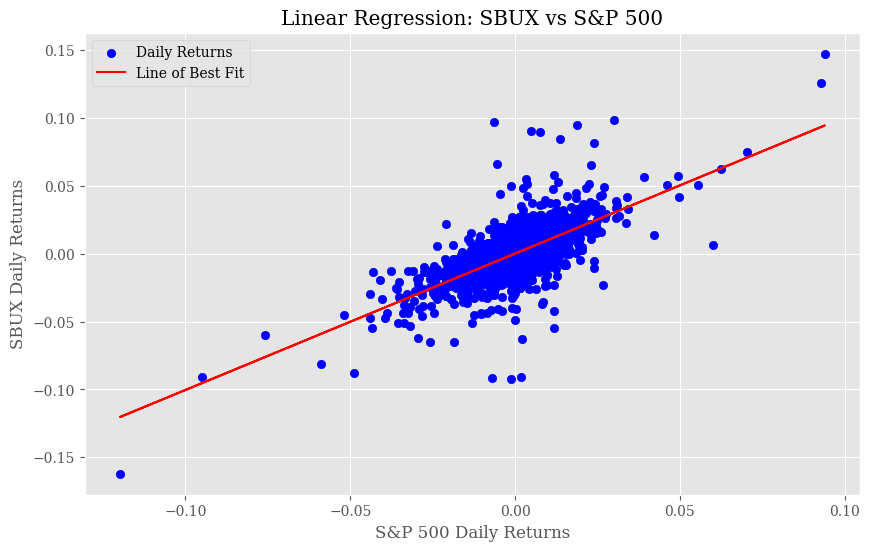

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Alpha (intercept) for SBUX: 0.0001261088121230878
Beta (slope) for SBUX: 1.004798563895572


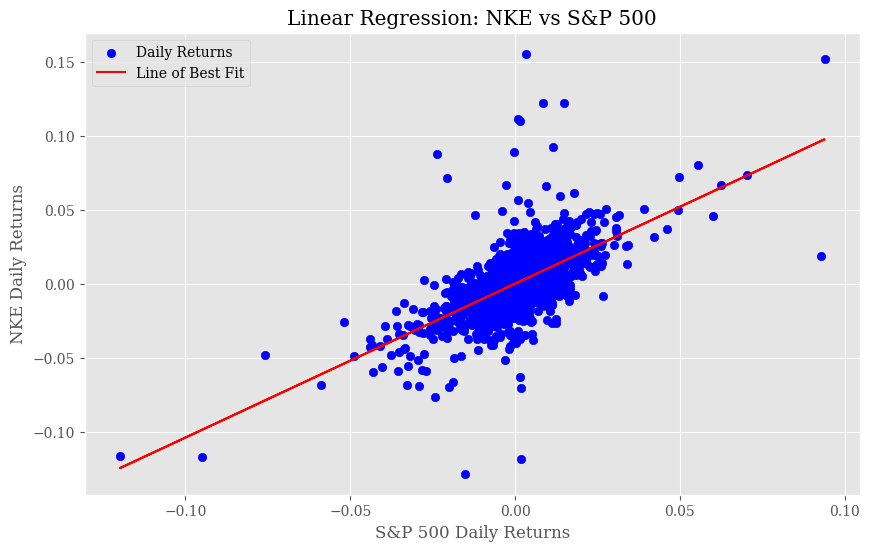

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Alpha (intercept) for NKE: 0.0001390097661868857
Beta (slope) for NKE: 1.0382809251878244
╔════════════════════════════════════════════════════════╗
║                   Cost of Equity                        ║
╠════════════════════════════════════════════════════════╣
║ Ticker     |     Beta        |     Cost of Equity (%)   ║
╠════════════╪═════════════════╪═════════════════════════╣
║ AMZN      | 1.142          | 11.380%                  ║



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

║ SBUX      | 1.004          | 9.944%                   ║
║ NKE       | 1.038          | 10.296%                  ║
╚════════════╧═════════════════╧═══════════════════════╝


In [11]:

def cost_of_equity(ticker, start, end):
    # Downloading S&P500 to calculate Expected Market Returns
    sp500 = yf.download('^GSPC', start=start, end=end).drop(columns=['Open','High','Low','Close','Volume'])
    sp500 = sp500.rename(columns={'Adj Close': 'SP500'})
    sp500rets = np.log(sp500 / sp500.shift(1))
    
    # Downloading ticker stock data
    stock = yf.download(ticker, start=start, end=end).drop(columns=['Open','High','Low','Close','Volume'])
    stock = stock.rename(columns={'Adj Close': ticker})
    stockrets = np.log(stock / stock.shift(1)) 
    
    # Joining the returns
    data = sp500.join(stock)
    datarets = sp500rets.join(stockrets)
    datarets = datarets.dropna()

    # US 10-Year Treasury Bond
    TNX = yf.Ticker("^TNX")
    
    # US Treasury 10-year bond for Risk-free rate
    risk_free_rate = yf.download('^TNX', start=start, end=end).drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
    risk_free_rate = risk_free_rate.rename(columns={'Adj Close': 'Risk Free Rate'})
    Rf = risk_free_rate.iloc[-1, 0] / 100
    
    # Expected Market Return
    ERm = datarets['SP500'].mean() * 252
    
    # Value of Beta
    B = np.polyfit(datarets['SP500'], datarets[ticker], deg=1)[0]
    
    # Capital Asset Pricing Model
    CAPM = exp((Rf + ERm - Rf) * B) - 1
    
    return B, CAPM

# Define your tickers, start date, and end date here
for ticker in tickers:
    analyze_ticker(ticker)
start = '2014-01-05'  # Example start date
end = '2024-01-05'  # Example end date

B = np.array([])
CAPM = np.array([])

print("╔════════════════════════════════════════════════════════╗")
print("║                   Cost of Equity                        ║")
print("╠════════════════════════════════════════════════════════╣")
print("║ Ticker     |     Beta        |     Cost of Equity (%)   ║")
print("╠════════════╪═════════════════╪═════════════════════════╣")
for ticker_i in tickers:
    B_i, CAPM_i = cost_of_equity(ticker_i, start, end)
    B = np.append(B, B_i)
    CAPM = np.append(CAPM, CAPM_i)
    print(f"║ {ticker_i:<10}| {'{:.4}'.format(B_i):<15}| {'{:.3%}'.format(CAPM_i):<25}║")
print("╚════════════╧═════════════════╧═══════════════════════╝")

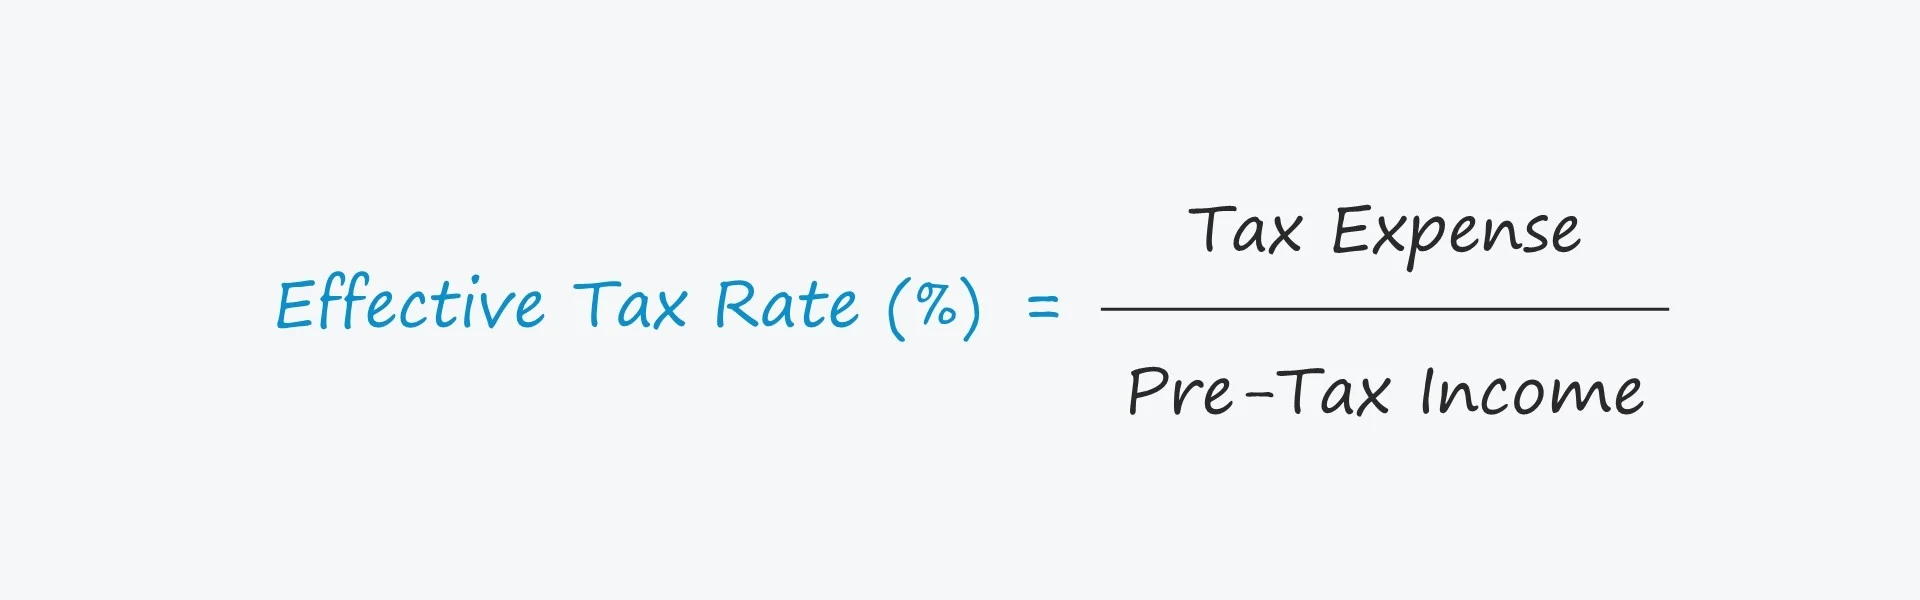

In [12]:
from IPython.display import Image
Image(filename='Effective-Tax-Rate-Formula.jpeg')


# Deciphering Corporate Taxes: An Analytical Approach to Understanding Financial Health and Tax Efficiency

For investors, disclosing a company's tax plan might be vital. By compiling the most recent financial information from a company's income statement and balance sheet, this programme performs the role of a detective. Finding pre-tax income and the income tax provision—two crucial numbers that reveal the company's tax circumstances—is given first priority. The function uses mathematical formulas to determine the company's current tax rate, or the portion of profit that is consumed by taxes. This figure provides insight into the business's tax efficiency and may also be a sign of its general financial stability. However, the function is not a hoover. Together with supporting documentation, such as the particular quarter and financial statements utilised, it displays the computed tax rate.

This complete image makes a more in-depth investigation possible. The tax rate can then be assessed by investors in light of the business's overall financial performance, which may reveal patterns or suggest topics for additional research. In the end, this feature gives investors the ability to make knowledgeable choices by offering a glimpse inside a company's tax plan.




In [13]:
#Function Definition for Tax Rate Calculation

def tax_rate_f(ticker):
    global most_recent_income_data, most_recent_balance_data
    stock = Ticker(ticker)
    stock_bal = stock.financials_balancesheet()
    stock_inc = stock.financials_inc_statement()
    most_recent_quarter = stock_bal.columns[-2]
    most_recent_balance_data = stock_bal[most_recent_quarter].to_frame().droplevel(0, axis=0)
    most_recent_income_data = stock_inc[most_recent_quarter].to_frame().droplevel(0, axis=0)
    pretax_income = most_recent_income_data.loc['Pretax Income'].iloc[0]
    tax = -most_recent_income_data.loc['Provision for Income Tax'].iloc[0]
    return [tax/pretax_income, most_recent_quarter, most_recent_balance_data, most_recent_income_data]

# Main Script: Calculating and Storing Tax Rates for Multiple Companies
tax_rate = np.array([])
most_recent_quarter = np.array([])
most_recent_balance_data = np.array([])
most_recent_income_data = np.array([])
for ticker_i in tickers:
    tax_rate_i = tax_rate_f(ticker_i)[0]
    most_recent_quarter_i = tax_rate_f(ticker_i)[1]
    most_recent_balance_data_i = tax_rate_f(ticker_i)[2]
    most_recent_income_data_i = tax_rate_f(ticker_i)[3]
    tax_rate = np.append(tax_rate, tax_rate_i)
    most_recent_quarter = np.append(most_recent_quarter, most_recent_quarter_i)
    most_recent_balance_data = np.append(most_recent_balance_data, most_recent_balance_data_i)
    most_recent_income_data = np.append(most_recent_income_data, most_recent_income_data_i)
    print(f"{ticker_i}'s tax rate is: {'{:.3%}'.format(tax_rate_i)}")

AMZN's tax rate is: 18.919%
SBUX's tax rate is: 23.464%
NKE's tax rate is: 12.015%


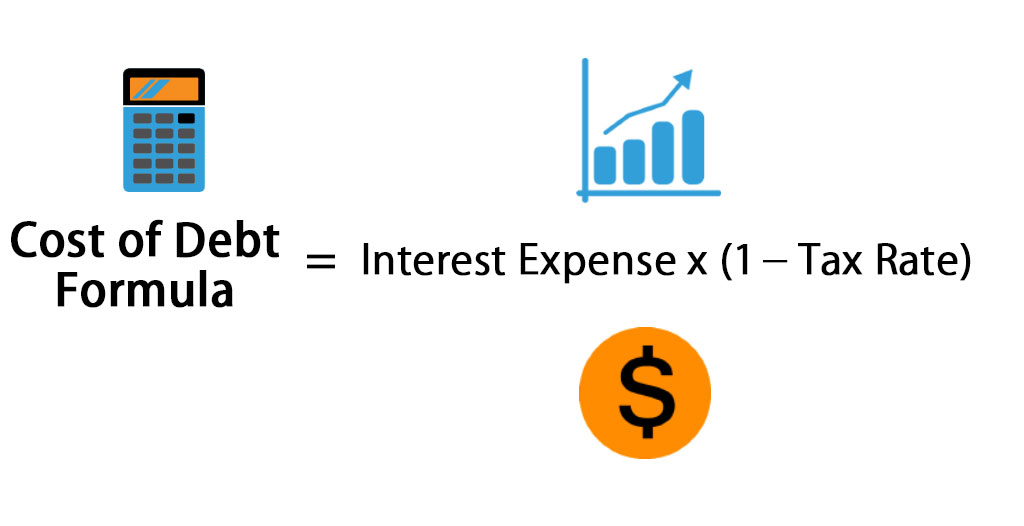

In [14]:
from IPython.display import Image
Image(filename='Cost-of-Debt-Formula.jpeg')


# Cost of Debt Analysis


This section focuses on evaluating the Cost of Debt for our selected companies. The Cost of Debt is crucial for understanding the interest expense related to any debts held by a company. It influences the overall cost of capital and, subsequently, the company's investment strategy and valuation. Below, we will calculate the Cost of Debt based on bond prices and yields, reflecting the risk and the time value of money. 

Initially, the code uses the wrds to connect to the WRDS servers.The wrds package offers the Connection() function. Financial databases and datasets provided on the WRDS platform are accessible through this connection.The cost_of_debt function retrieves bond-related information from the WRDS database for the designated ticker symbol. It returns data on bonds linked to the given corporate symbol, including yields, maturity dates, and outstanding amounts of bonds. In order to guarantee that only pertinent, active bonds are taken into account for the computation of the cost of debt, the function next filters the bond data to include only bonds with maturity dates after the current date. 

The weighted average yield of the bonds is then determined using the function using the outstanding amount of each bond as the weight. The average yield of the company's outstanding bonds is estimated here, weighted by the bonds' different sizes. The function calculates the pre-tax cost of debt using the given tax rate and the weighted average yield that was determined. The cost of debt is adjusted by the tax rate, which takes into account the tax shelter that is created by deducting interest payments from taxable income. 

Lastly, for the given company ticker symbol, the function returns the pre-tax cost of debt.The cost_of_debt function is used repeatedly in the main script to apply to different ticker symbols that are kept in the tickers list. The function determines and outputs the corresponding pre-tax cost of debt for each ticker symbol. This makes it possible to compare the cost of debt for various businesses.







In [37]:

#Connecting to WRDS servers
try:
    conn = wrds.Connection()   
except PendingRollbackError:
    wrds.rollback()
  
def cost_of_debt(ticker, tax_rate):    
    # Brings in ticker Bonds' information as a table
    rows = conn.get_table(library='wrdsapps_bondret',table='bondret', columns = ['date', 'cusip', 'isin', 'company_symbol',
                          'offering_amt', 'amount_outstanding', 'maturity', 'yield'])

    # Brings in relevant ticker data from the Bond table
    from datetime import date
    today = date.today()
    bondticker = rows[rows["company_symbol"].isin([ticker])]
    bondmat = bondticker[bondticker["maturity"] > today]
    ubonds = bondmat.groupby("isin", as_index=False).last()
    
    #  weighted yield
    ubonds["weighted yield"] = ubonds["yield"] * ubonds["amount_outstanding"]
    
    # the Calculation of the total weight
    total_weight = ubonds["amount_outstanding"].sum()
   
    # Calculating the total weighted yield
    total_weighted_yield = ubonds["weighted yield"].sum()
    
    #Calculating weighted average yield/pre-tax cost of debt
    weighted_average_yield = total_weighted_yield / total_weight
    
    # Cost of Debt Calculation
    CoD = ((1-tax_rate) * weighted_average_yield)
    
    return CoD

CoD = np.array([])
for count, ticker_i in enumerate(tickers):
    CoD_i = cost_of_debt(ticker_i, tax_rate[count])
    CoD = np.append(CoD, CoD_i)
    print(f"The Cost of Debt for {ticker_i} is: {'{:.3%}'.format(CoD_i)}")


Enter your WRDS username [macbook]:moeamr
Enter your password:········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
Loading library list...
Done
The Cost of Debt for AMZN is: 3.893%
The Cost of Debt for SBUX is: 3.942%
The Cost of Debt for NKE is: 4.142%


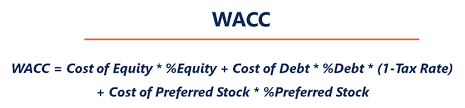

In [38]:
from IPython.display import Image
Image(filename='WACC FORMULA.png')

# Understanding and Calculating WACC: Navigating Investment and Value Creation

The average cost of all the capital needed to fund a business's activities is represented by the WACC. In order to assess possible investment projects or calculate the present value of future cash flows, it is used as a discount rate. It is essential to comprehend a company's WACC in order to evaluate the viability and profitability of investment prospects.

Stakeholders can make well-informed judgements about capital budgeting, project appraisal, and capital allocation by calculating the WACC. They can evaluate the attractiveness of investment possibilities and prioritise resource allocation by comparing the WACC to the projected return on investment or project cost of capital. The WACC is used as a standard to assess how well a business can generate value for its investors. When a company's return on investment surpasses the weighted average cost of capital (WACC), it suggests that it is outperforming its capital costs and may be adding value for its investors. On the other hand, a return that is less than the weighted average cost of capital (WACC) could indicate inefficiency or a lack of profitability.

The function starts by obtaining the balance sheet and income statement for the given firm ticker from the most current financial statements. To extract the pertinent financial measures required to compute the WACC, this data is crucial.

Subsequently, the function takes the total equity and liabilities off of the balance sheet. These figures are used as inputs to establish the capital structure of the business, which is necessary to compute the WACC. To calculate the overall weighted average cost of capital (WACC), the function weighs the cost of equity and debt (adjusted for tax implications) according to their respective proportions in the capital structure of the business.


In [40]:
# WACC Calculation Function

def WACC (most_recent_balance_data, most_recent_income_data, tax_rate, CoD, CAPM, ticker):
     # Retrieving company's financial statements
    stock = Ticker(ticker)
    stock_bal = stock.financials_balancesheet()
    stock_inc = stock.financials_inc_statement()
    most_recent_quarter = stock_bal.columns[-2] # Assuming this is the most recent quarter
    most_recent_balance_data = stock_bal[most_recent_quarter].to_frame().droplevel(0, axis=0)
    most_recent_income_data = stock_inc[most_recent_quarter].to_frame().droplevel(0, axis=0)
    # Extracting debt and equity values from the balance sheet
    debt = most_recent_balance_data.loc['Total Liabilities'].iloc[0] 
    equity = most_recent_balance_data.loc['Total Equity'].iloc[0]
        # Calculating WACC
    wacc = (debt/(debt+equity)*CoD*(1-tax_rate)+equity/(debt+equity)*CAPM)
    return wacc


wacc = np.array([])
for count, ticker_i in enumerate(tickers):
    wacc_i = WACC(most_recent_balance_data[count], most_recent_income_data[count], tax_rate[count], 
                          CoD[count], CAPM[count], ticker_i)
    wacc = np.append(wacc, wacc_i)
    print(f"{ticker_i}'s WACC = {'{:.2%}'.format(wacc_i)}")

AMZN's WACC = 6.25%
SBUX's WACC = 1.14%
NKE's WACC = 6.17%


 # Summary of Calculations and Key Insights
 
 
We assessed the capital expenses, financial metrics, and stock volatilities of a few chosen corporations in our financial analysis. The combined results and their ramifications are as follows:

Beta Coefficients: The computed beta values show how the stocks of each firm perform in relation to the S&P 500, which is the market average. Businesses with beta values greater than one are more erratic than the market, which may mean higher risk but also bigger potential rewards. On the other hand, businesses with beta values smaller than 1 are thought to be less volatile and safer investments.

Cost of Debt (CoD): The analysis reveals differences in the companies' cost of debt, which is a reflection of the interest rates they pay on their loans. A lower debt load is better because it means there are more affordable financing possibilities. Businesses with reduced cost of debt (CoD) may also have better credit scores or better loan terms.

Cost of Equity (CoE): Our research shows that shareholders expect varying amounts of return from their investments in different organisations. A greater cost of equity is indicative of higher expected returns by investors, usually as a result of higher perceived risk. This may have an effect on the total valuation and equity financing of a business.

Weighted Average Cost of Capital (WACC): We evaluated each company's total financing costs by combining the expenses of debt and equity by computing WACC. In general, a lower WACC is preferable since it suggests fewer total fundraising expenses. Businesses with lower WACC are better able to finance new initiatives or grow their business operations in an economical manner.

Finally, our financial study reveals how different the chosen companies' market forecasts, financing costs, and risk profiles are. These insights are essential for making well-informed finance and investment decisions that attempt to strike a risk-return balance that is consistent with each company's position in the market and its strategic goals.


